In [670]:
import numpy as np
import os
import numpy as np
import itertools
import math, random
random.seed = 42
import numpy as np
import open3d as o3d
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import pygem
from pygem import CustomDeformation
print(pygem.__version__)
from plyfile import PlyData
import scipy.spatial.distance
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from FFD import _calculate_ffd
from pygem import FFD
from visualize import pcshow,pc_show_multi,visualize_rotate,pcwrite
from point_utils import *
from bernsetin import *
from path import Path
# from pointflow_fig_colorful import generate_mxl



2.0.0


In [671]:
class PointSampler(object):
    def __init__(self, output_size):
        assert isinstance(output_size, int)
        self.output_size = output_size
    
    def triangle_area(self, pt1, pt2, pt3):
        side_a = np.linalg.norm(pt1 - pt2)
        side_b = np.linalg.norm(pt2 - pt3)
        side_c = np.linalg.norm(pt3 - pt1)
        s = 0.5 * ( side_a + side_b + side_c)
        return max(s * (s - side_a) * (s - side_b) * (s - side_c), 0)**0.5

    def sample_point(self, pt1, pt2, pt3):
        # barycentric coordinates on a triangle
        # https://mathworld.wolfram.com/BarycentricCoordinates.html
        s, t = sorted([random.random(), random.random()])
        f = lambda i: s * pt1[i] + (t-s)*pt2[i] + (1-t)*pt3[i]
        return (f(0), f(1), f(2))
        
    
    def __call__(self, mesh):
        verts, faces = mesh
        verts = np.array(verts)
        areas = np.zeros((len(faces)))

        for i in range(len(areas)):
            areas[i] = (self.triangle_area(verts[faces[i][0]],
                                           verts[faces[i][1]],
                                           verts[faces[i][2]]))
            
        sampled_faces = (random.choices(faces, 
                                      weights=areas,
                                      cum_weights=None,
                                      k=self.output_size))
        
        sampled_points = np.zeros((self.output_size, 3))

        for i in range(len(sampled_faces)):
            sampled_points[i] = (self.sample_point(verts[sampled_faces[i][0]],
                                                   verts[sampled_faces[i][1]],
                                                   verts[sampled_faces[i][2]]))
        
        return sampled_points
    

class Normalize(object):
        def __call__(self, pointcloud):
            assert len(pointcloud.shape)==2
            
            norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
            norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))

            return  norm_pointcloud

def read_off(file):
    off_header = file.readline().strip()
    if 'OFF' == off_header:
        n_verts, n_faces, __ = tuple([int(s) for s in file.readline().strip().split(' ')])
    else:
        n_verts, n_faces, __ = tuple([int(s) for s in off_header[3:].split(' ')])
    verts = [[float(s) for s in file.readline().strip().split(' ')] for i_vert in range(n_verts)]
    faces = [[int(s) for s in file.readline().strip().split(' ')][1:] for i_face in range(n_faces)]
    return verts, faces



In [672]:
from path import Path

path = Path('/Users/wuhongyu/code/Dataset/ModelNet40')

folders = [dir for dir in sorted(os.listdir(path)) if os.path.isdir(path/dir)]
classes = {folder: i for i, folder in enumerate(folders)};

In [673]:
classes

{'airplane': 0,
 'bathtub': 1,
 'bed': 2,
 'bench': 3,
 'bookshelf': 4,
 'bottle': 5,
 'bowl': 6,
 'car': 7,
 'chair': 8,
 'cone': 9,
 'cup': 10,
 'curtain': 11,
 'desk': 12,
 'door': 13,
 'dresser': 14,
 'flower_pot': 15,
 'glass_box': 16,
 'guitar': 17,
 'keyboard': 18,
 'lamp': 19,
 'laptop': 20,
 'mantel': 21,
 'monitor': 22,
 'night_stand': 23,
 'person': 24,
 'piano': 25,
 'plant': 26,
 'radio': 27,
 'range_hood': 28,
 'sink': 29,
 'sofa': 30,
 'stairs': 31,
 'stool': 32,
 'table': 33,
 'tent': 34,
 'toilet': 35,
 'tv_stand': 36,
 'vase': 37,
 'wardrobe': 38,
 'xbox': 39}

In [713]:
name = 'vase'
with open(path/name+"/train/"+name+"_0012.off", 'r') as f:

    data  = read_off(f)
    verts, faces  = data 


In [714]:
pointcloud = PointSampler(3000)((verts, faces))
norm_pointcloud = Normalize()(pointcloud)

In [715]:
ffd_1 = FFD([3, 3, 3])
ffd_1.box_length = [2, 2, 2]


In [1]:
pcshow(*(norm_pointcloud).T)

NameError: name 'pcshow' is not defined

In [896]:

ffd_1 = FFD([3, 3, 3])
ffd_1.box_length = [2, 2, 2]


# ffd_1.array_mu_z[1,  0, 0] = 1
ffd_1.array_mu_y[1,  0, 0] = -2

# ffd_1.array_mu_z[1,  1, 0] = -1
ffd_1.array_mu_y[1,  1, 0] = -1
ffd_1.array_mu_y[1,  0, 1] = -1


# ffd_1.array_mu_x[2,1,1] = 1
# ffd_1.array_mu_y[2,1,1] = -1

# ffd_1.array_mu_x[0,1,1] = -1
# ffd_1.array_mu_y[0,1,1] = -1

# ffd_1.array_mu_z[2,0,2] = 1
# ffd_1.array_mu_z[0,0,2] = 1

# ffd_1.array_mu_x[2,0,2] = 1
# ffd_1.array_mu_x[0,0,2] = -1

# ffd_1.array_mu_z[2,0,1] = 1
# ffd_1.array_mu_z[0,0,1] = 1





# ffd_1.array_mu_z[1,2,2] = 2
# ffd_1.array_mu_z[2,1,2] = 1
# ffd_1.array_mu_z[0,1,2] = 1




# #cup
# ffd_1.array_mu_z[2,1,1] =  1
# ffd_1.array_mu_x[2,1,2] = 1

# ffd_1.array_mu_x[2,1,1] = 2

# # flowerpot0001
# ffd_1.array_mu_y[1,2,0] = 1
# ffd_1.array_mu_y[1,0,0] = -1
# ffd_1.array_mu_x[2,1,0] = 1
# ffd_1.array_mu_x[0,1,0] = -1



# # chair0018
# ffd_1.array_mu_y[1,2,2] = 2
# ffd_1.array_mu_z[1,2,2] = -0.5


# # airplane
# ffd_1.array_mu_x[2,1,1] = 0.5
# ffd_1.array_mu_y[2,1,1] = 2.5
# ffd_1.array_mu_x[0,1,1] = -0.5
# ffd_1.array_mu_y[0,1,1] = 2.5






deformed_points_1 = ffd_1(np.asarray(norm_pointcloud)+1)
pc_show_multi(deformed_points_1.T,ffd_1.control_points().T)
# norm_pointcloud_1 = Normalize()(deformed_points_1)

pc_show_multi(deformed_points_1.T,ffd_1.control_points()[:1].T-1)


In [779]:
ffd_2 = FFD([3, 3, 3])
ffd_2.box_length = [2, 2, 2]


ffd_2.array_mu_z[1,1,2] =  3
# ffd_2.array_mu_x[1,2,1] =  -2




# #bench
# ffd_2.array_mu_z[2,2,0] =  -1
# ffd_2.array_mu_x[2,2,0] =  1


# ffd_2.array_mu_z[2,0,0] =  -1
# ffd_2.array_mu_x[2,0,0] =  1


# ffd_2.array_mu_z[1,1,2] =  1
# ffd_2.array_mu_x[1,1,2] =  2

# ffd_2.array_mu_x[0,1,1] =  -1
# ffd_2.array_mu_x[2,1,1] =  1

#airplane
# ffd_2.array_mu_z[1,2,2] =  2
# ffd_2.array_mu_z[1,2,1] =  0.5

# #cup
# ffd_2.array_mu_y[1,2,2] =  -1
# ffd_2.array_mu_y[1,0,2] =  1
# ffd_2.array_mu_x[0,1,2] =  1
# ffd_2.array_mu_z[1,1,0] =  -2
# ffd_2.array_mu_z[1,1,2] =  1

deformed_points_2 = ffd_2(np.asarray(norm_pointcloud)+1)
pc_show_multi(deformed_points_2.T,ffd_2.control_points().T)
pc_show_multi(deformed_points_2.T,ffd_2.control_points()[:1].T-1)


In [752]:
# norm_pointcloud_1 = Normalize()(deformed_points_1)
# norm_pointcloud_2 = Normalize()(deformed_points_2)
# translated_origin
pc_show_multi(deformed_points_1.T,deformed_points_2.T)

In [780]:
translated_origin=(norm_pointcloud.T+1).T
mixup = 0.5 * deformed_points_1 + 0.5* deformed_points_2 
pcshow(*(mixup).T)

In [781]:
translated_origin=(norm_pointcloud.T+1).T
mixup = 0.5 * deformed_points_1 + 0.5* deformed_points_2 
mixup_ = 0.5 *translated_origin + 0.5 * mixup

pcshow(*(mixup).T)

In [782]:
pc_show_multi(mixup.T,mixup_.T)

## Mix Up_custom

In [826]:
def pc_show_multi_list(object_coords_list):
    """
    xs,ys,zs the coordinates from ML40 object;
    xp,yp,zp  the coordinated from FFD control points 
    """

    data = []
    for pc_object in object_coords_list:
        x,y,z = pc_object
        data.append(go.Scatter3d(x=x, y=y, z=z,mode='markers'))    
    # data = [,
    #         go.Scatter3d(x=xp, y=yp, z=zp, mode='markers'),
    #         go.Scatter3d(x=xp, y=yp, z=zp, mode='markers')]
    fig = visualize_rotate(data)
    fig.update_traces(marker=dict(size=2,
                      line=dict(width=2,
                      color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.show()




In [1042]:
ffd_mixup  = FFD([3, 3, 3])
ffd_mixup.box_length = [2, 2, 2]
# mixupt = 0.5 * deformed_points_1 + 0.5 * deformed_points_2


ffd_mixup.array_mu_y[1,  0, 0] = -2
ffd_mixup.array_mu_z[1,1,2] =  3

# ffd_1.array_mu_z[1,  1, 0] = -1
ffd_mixup.array_mu_y[1,  1, 0] = -1
ffd_mixup.array_mu_y[1,  0, 1] = -1


# ffd_mixup.array_mu_z[1,  1, 0] = -1
# ffd_mixup.array_mu_y[1,  1, 0] = -1
# ffd_mixup.array_mu_y[1,  0, 1] = -1

# ffd_mixup.array_mu_x[2,1,1] = 1
# ffd_mixup.array_mu_y[2,1,1] = -1

# ffd_mixup.array_mu_x[0,1,1] = -1
# ffd_mixup.array_mu_y[0,1,1] = -1

# ffd_mixup.array_mu_z[2,0,2] = 1
# ffd_mixup.array_mu_z[0,0,2] = 1
# ffd_mixup.array_mu_z[2,0,1] = 1
# ffd_mixup.array_mu_z[0,0,1] = 1


# ffd_mixup.array_mu_y[1,2,1] =  1
# ffd_mixup.array_mu_x[1,2,1] =  -2
# #bench
# ffd_mixup.array_mu_z[2,2,0] =  -1
# ffd_mixup.array_mu_x[2,2,0] =  1
# ffd_mixup.array_mu_z[2,0,0] =  -1
# ffd_mixup.array_mu_x[2,0,0] =  1
# ffd_mixup.array_mu_x[2,1,1] = 2.5


# flowe pot
# ffd_mixup.array_mu_y[1,2,0] = 1
# ffd_mixup.array_mu_y[1,0,0] = -1
# ffd_mixup.array_mu_x[2,1,0] = 1
# ffd_mixup.array_mu_x[0,1,0] = -1
# ffd_mixup.array_mu_z[1,1,2] =  1
# ffd_mixup.array_mu_x[1,1,2] =  2


#chair0008
# ffd_mixup.array_mu_y[1,2,2] = 2
# ffd_mixup.array_mu_z[1,2,2] = -0.5
# ffd_mixup.array_mu_z[2,1,1] =  1
# ffd_mixup.array_mu_x[2,1,2] = 1
# ffd_mixup.array_mu_x[0,1,2] = -1
# ffd_mixup.array_mu_z[0,1,1] =  1

# # plaine0018
# ffd_mixup.array_mu_x[2,1,1] = 0.5
# ffd_mixup.array_mu_y[2,1,1] = 3
# ffd_mixup.array_mu_x[0,1,1] = -0.5
# ffd_mixup.array_mu_y[0,1,1] = 3
# ffd_mixup.array_mu_z[1,2,2] =  2
# ffd_mixup.array_mu_y[1,2,2] =  1

# ffd_mixup.array_mu_z[1,2,1] =  0.5
# ffd_mixup.array_mu_y[1,2,1] =  0.5

#cup
# ffd_mixup.array_mu_z[2,1,1] =  1
# ffd_mixup.array_mu_x[2,1,2] = 0.5
# ffd_mixup.box_length = [2, 2, 2 ]
# ffd_mixup.box_length = [2, 2, 2]
# ffd_mixup.array_mu_y[1,2,2] =  -1
# ffd_mixup.array_mu_y[1,0,2] =  1
# ffd_mixup.array_mu_x[0,1,2] =  1
# ffd_mixup.array_mu_z[1,1,0] =  -2
# ffd_mixup.array_mu_z[1,1,2] =  1

new_mixup = ffd_mixup(np.asarray(norm_pointcloud)+1)
# new_mixup = ffd_mixup(np.asarray(norm_pointcloud)+1)
pc_show_multi(new_mixup.T,ffd_mixup.control_points().T)

In [1043]:
ffd_mixup  = FFD([3, 3, 3])
ffd_mixup.box_length = [2, 2, 2]
# mixupt = 0.5 * deformed_points_1 + 0.5 * deformed_points_2


# #bench
# ffd_mixup.array_mu_z[2,2,0] =  -1
# ffd_mixup.array_mu_x[2,2,0] =  1
# ffd_mixup.array_mu_z[2,0,0] =  -1
# ffd_mixup.array_mu_x[2,0,0] =  1
# ffd_mixup.array_mu_x[2,1,1] = 2.5


# flowe pot
# ffd_mixup.array_mu_y[1,2,0] = 1
# ffd_mixup.array_mu_y[1,0,0] = -1
# ffd_mixup.array_mu_x[2,1,0] = 1
# ffd_mixup.array_mu_x[0,1,0] = -1
# ffd_mixup.array_mu_z[1,1,2] =  1
# ffd_mixup.array_mu_x[1,1,2] =  2


#chair0008
# ffd_mixup.array_mu_y[1,2,2] = 2
# ffd_mixup.array_mu_z[1,2,2] = -0.5
# ffd_mixup.array_mu_z[2,1,1] =  1
# ffd_mixup.array_mu_x[2,1,2] = 1
# ffd_mixup.array_mu_x[0,1,2] = -1
# ffd_mixup.array_mu_z[0,1,1] =  1

# # plaine0018
# ffd_mixup.array_mu_x[2,1,1] = 0.5/2
# ffd_mixup.array_mu_y[2,1,1] = 3/2
# ffd_mixup.array_mu_x[0,1,1] = -0.5/2
# ffd_mixup.array_mu_y[0,1,1] = 3/2
# ffd_mixup.array_mu_z[1,2,2] =  2/2
# ffd_mixup.array_mu_y[1,2,2] =  1/2

# ffd_mixup.array_mu_z[1,2,1] =  0.5/2
# ffd_mixup.array_mu_y[1,2,1] =  0.5/2

#cup
# ffd_mixup.array_mu_z[2,1,1] =  1
# ffd_mixup.array_mu_x[2,1,2] = 0.5
# ffd_mixup.box_length = [2, 2, 2 ]
# ffd_mixup.box_length = [2, 2, 2]
# ffd_mixup.array_mu_y[1,2,2] =  -1
# ffd_mixup.array_mu_y[1,0,2] =  1
# ffd_mixup.array_mu_x[0,1,2] =  1
# ffd_mixup.array_mu_z[1,1,0] =  -2
# ffd_mixup.array_mu_z[1,1,2] =  1

# mixup = ffd_mixup(np.asarray(norm_pointcloud)+1)
# new_mixup = ffd_mixup(np.asarray(norm_pointcloud)+1)
# pc_show_multi(mixup.T,ffd_mixup.control_points().T)

## Mix Up

In [1044]:
pcshow(*(new_mixup).T)

In [1045]:
norm_new_mixup= Normalize()(new_mixup)
pc_show_multi_list([norm_pointcloud.T+1,deformed_points_1.T,deformed_points_2.T,mixup_.T,new_mixup.T])

## Coloring point cloud

In [1046]:
def save_pcd(root,class_name,pcd_list):
#   check whether the specified path exists or not
    isExist = os.path.exists(os.path.join(root,class_name))
    if not isExist:
   # Create a new directory because it does not exist
        os.mkdir(os.path.join(root,class_name))
        os.mkdir(os.path.join(root,class_name,'pointcloud'))
        os.mkdir(os.path.join(root,class_name,'render_img'))

    np.save(file=root+"/"+class_name+"/"+"pointcloud/origin.npy",arr=pcd_list[0])
    np.save(file=root+"/"+class_name+"/"+"pointcloud/deform_1.npy",arr=pcd_list[1])
    np.save(file=root+"/"+class_name+"/"+"pointcloud/deform_2.npy",arr=pcd_list[2])
    np.save(file=root+"/"+class_name+"/"+"pointcloud/deform_mixup.npy",arr=pcd_list[3])
    np.save(file=root+"/"+class_name+"/"+"pointcloud/deform_newmixup.npy",arr=pcd_list[4])

In [1047]:
os.path.exists(os.path.join('Deform_custom_img','airplane'))

True

In [1048]:
# ed_origin = poitnt_level_distance(norm_pointcloud,norm_pointcloud,origin_=True)

# np.save(file='Deform_custom_img'+"/"+'airplane'+"/"+"pointcloud/cp.npy",arr=p.T)
# np.save(file='Deform_custom_img'+"/"+'airplane'+"/"+"pointcloud/origin.npy",arr=ed_origin.T)

In [1049]:
def poitnt_level_distance(origin,deform_points,origin_=False):
    def euclidean(x, y):
    # 欧氏距离
        el = np.sqrt((x.T - y.T) ** 2)
        return el
    if  origin_:
        translated_origin = origin
    else:
        translated_origin=(origin.T+1).T
    ed_distance = np.sum(euclidean(translated_origin.T,deform_points.T),axis=1)
    ed_distance_col = np.reshape(ed_distance,(-1,1))
    deformed_points_ed = np.append(deform_points.T,ed_distance_col.T,axis=0)
    return  deformed_points_ed

In [1050]:
def euclidean(x, y):
    # 欧氏距离
        el = np.sqrt((x.T - y.T) ** 2)
        return el
    # translated_origin=(origin.T+1).T
ed_distance = np.sum(euclidean(norm_pointcloud.T,norm_pointcloud.T),axis=1)
ed_distance_col = np.reshape(ed_distance,(-1,1))


In [1051]:
np.append(norm_pointcloud.T,ed_distance_col.T,axis=0)

array([[ 0.44211474,  0.46443464, -0.05876676, ...,  0.55195515,
        -0.37710087, -0.02490899],
       [ 0.03450653, -0.28543812, -0.65205386, ..., -0.60883901,
        -0.71950269,  0.2483463 ],
       [-0.75155758,  0.69436101, -0.53596091, ..., -0.25522328,
        -0.31546131, -0.75155758],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [1052]:
ed_origin = poitnt_level_distance(norm_pointcloud,norm_pointcloud,origin_=True)
ed_distance_df1 = poitnt_level_distance(norm_pointcloud,deformed_points_1)
ed_distance_df2 = poitnt_level_distance(norm_pointcloud,deformed_points_2)
ed_distance_mixup= poitnt_level_distance(norm_pointcloud,mixup)
ed_distance_new_mixup= poitnt_level_distance(norm_pointcloud,new_mixup)
pcd_list = [ed_origin.T,ed_distance_df1.T,ed_distance_df2.T,ed_distance_mixup.T,ed_distance_new_mixup.T]


In [1053]:
save_pcd("Deform_custom_img",name,pcd_list)

In [1054]:
pcd_list[2]

array([[1.44211474, 1.03450653, 0.2670423 , 0.01859988],
       [1.46443464, 0.71456188, 2.46992326, 0.77556225],
       [0.94123324, 0.34794614, 0.51029574, 0.04625665],
       ...,
       [1.55195515, 0.39116099, 0.83579994, 0.09102323],
       [0.62289913, 0.28049731, 0.75724001, 0.07270132],
       [0.97509101, 1.2483463 , 0.27014774, 0.02170532]])

### Generate the colormap and render img

In [1055]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# Define the threshold for special coloring
threshold = 0.18
n_colors = 4000
# Define colors: dark blue for below threshold, and orange to dark red for above threshold
dark_blue = np.array([0, 0, 0.5])   # Dark blue
light_blue = np.array([0.678,0.847,0.902])
start_color = np.array([1, 0.5, 0]) # Orange
end_color = np.array([0.5, 0, 0])   # Dark red

# Calculate the proportion of the colormap dedicated to each part
proportion = threshold / 0.3914

# Calculate the number of colors for each part of the colormap
n_dark_blue = int(n_colors * proportion)
n_gradient = n_colors - n_dark_blue

# Create the color arrays
dark_blue_colors = np.tile(dark_blue, (n_dark_blue, 1))
gradient_cool_colors = np.zeros((n_dark_blue, 3))
gradient_warm_colors = np.zeros((n_gradient, 3))
for i in range(3):
    gradient_warm_colors[:, i] = np.linspace(light_blue[i], start_color[i], n_gradient)
for i in range(3):
    gradient_cool_colors[:, i] = np.linspace(dark_blue[i], light_blue[i], n_dark_blue)

# Combine the color arrays to form the final colormap
combined_colors = np.vstack((gradient_cool_colors, gradient_warm_colors))

# Create the colormap
custom_cmap = ListedColormap(combined_colors)

In [1056]:
len(custom_cmap.colors)

4000

In [1057]:
# def generate_mxll_all(root,class_name,pcd_list,cmp):
#     generate_mxl(root=root,class_name=class_name,deform_type="origin",pcd=pcd_list[0],cmap=cmp)
#     generate_mxl(root=root,class_name=class_name,deform_type="deform1",pcd=pcd_list[1],cmap=cmp)
#     generate_mxl(root=root,class_name=class_name,deform_type="deform2",pcd=pcd_list[2],cmap=cmp)
#     generate_mxl(root=root,class_name=class_name,deform_type="mixup",pcd=pcd_list[3],cmap=cmp)
#     generate_mxl(root=root,class_name=class_name,deform_type="newmixup",pcd=pcd_list[4],cmap=cmp)
#     print('Done')

# generate_mxll_all("Deform_custom_img",'bench',pcd_list,custom_cmap)


In [1058]:
ed_distance_new_mixup

array([[ 1.44211474,  1.46443464,  0.94123324, ...,  1.55195515,
         0.62289913,  0.97509101],
       [ 0.39793601,  0.60712742, -0.86538107, ..., -0.25981162,
        -0.64307325,  0.64148097],
       [ 0.2670423 ,  2.46992326,  0.51029574, ...,  0.83579994,
         0.75724001,  0.27014774],
       [ 0.6551704 ,  0.88299671,  1.25958386, ...,  0.74199584,
         0.99627189,  0.62857064]])

In [1059]:
# Define the threshold for special coloring
threshold = 0.4
n_colors = 2048
# Define colors: dark blue for below threshold, and orange to dark red for above threshold
dark_blue = np.array([0, 0, 0.5])   # Dark blue
light_blue = np.array([0.678,0.847,0.902])
start_color = np.array([1, 0.5, 0]) # Orange
end_color = np.array([0.5, 0, 0])   # Dark red

# Calculate the proportion of the colormap dedicated to each part
proportion = threshold / (np.max(ed_distance_new_mixup) - np.min(ed_distance_new_mixup))

# Calculate the number of colors for each part of the colormap
n_dark_blue = int(n_colors * proportion)
n_gradient = n_colors - n_dark_blue

# Create the color arrays
dark_blue_colors = np.tile(dark_blue, (n_dark_blue, 1))
gradient_cool_colors = np.zeros((n_dark_blue, 3))
gradient_warm_colors = np.zeros((n_gradient, 3))
for i in range(3):
    gradient_warm_colors[:, i] = np.linspace(light_blue[i], start_color[i], n_gradient)
for i in range(3):
    gradient_cool_colors[:, i] = np.linspace(dark_blue[i], light_blue[i], n_dark_blue)

# Combine the color arrays to form the final colormap
combined_colors = np.vstack((gradient_cool_colors, gradient_warm_colors))

# Create the colormap
custom_cmap = ListedColormap(combined_colors)


# # Optional: Display the colormap
# plt.imshow([combined_colors], aspect='auto')
# plt.title("Custom Colormap: Dark Blue for <0.18, Orange to Dark Red for >0.18")
# plt.xlabel("Distance (normalized)")
# plt.gca().axes.get_yaxis().set_visible(False)  # Hide the y-axis
# plt.show()

In [1060]:
def generate_img(data,threshold,light=None):
    # Define the threshold for special coloring
    threshold = threshold
    n_colors = 2048
    # Define colors: dark blue for below threshold, and orange to dark red for above threshold
    dark_blue = np.array([0, 0, 0.5])   # Dark blue
    light_blue = np.array([0.678,0.847,0.902])
    orange = np.array([1, 0.5, 0]) # Orange
    dark_red = np.array([0.5, 0, 0]) 
    if light:
        dark_red = np.array([0.3, 0, 0])   # Dark red
    data = data.T

    x, y, z, distance = data[:,0], data[:,1], data[:,2], data[:,3]

  
    if distance.min()==distance.max():
        cool_colors = np.zeros((n_colors, 3))
        for i in range(3):
           cool_colors[:, i] = np.linspace(dark_blue[i], dark_blue[i], n_colors)
        custom_cmap = ListedColormap(cool_colors)

                # Create a 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        # Scatter plot with colormap
        scatter = ax.scatter(x, y, z, c=distance, cmap=custom_cmap)
    else:
        # Calculate the proportion of the colormap dedicated to each part
        proportion = threshold / (np.max(data) - np.min(data))

        # Calculate the number of colors for each part of the colormap
        n_dark_blue = int(n_colors * proportion)
        n_gradient = n_colors - n_dark_blue

        # Create the color arrays
        dark_blue_colors = np.tile(dark_blue, (n_dark_blue, 1))
        gradient_cool_colors = np.zeros((n_dark_blue, 3))
        gradient_warm_colors = np.zeros((n_gradient, 3))
        for i in range(3):
            gradient_warm_colors[:, i] = np.linspace(light_blue[i], dark_red[i], n_gradient)
        for i in range(3):
            gradient_cool_colors[:, i] = np.linspace(dark_blue[i], light_blue[i], n_dark_blue)

        # Combine the color arrays to form the final colormap
        combined_colors = np.vstack((gradient_cool_colors, gradient_warm_colors))
        custom_cmap = ListedColormap(combined_colors)
        # Your NumPy array
        # Extracting x, y, z, and distance

        # Normalize distance for color mapping
        distance_normalized = (distance - distance.min()) / (distance.max() - distance.min())

        # Create a 3D scatter plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot with colormap
        scatter = ax.scatter(x, y, z, c=distance_normalized, cmap=custom_cmap)

    # Add a color bar
    plt.colorbar(scatter)

    # Show the plot
    plt.show()
# Create the colormap
    

In [1061]:
ed_distance_mixup

array([[ 1.44211474,  1.46443464,  0.94123324, ...,  1.55195515,
         0.62289913,  0.97509101],
       [ 0.71622127,  0.66084465, -0.25871747, ...,  0.06567468,
        -0.18128797,  0.94491363],
       [ 0.17556107,  2.08171926,  0.60322229, ...,  0.83581407,
         0.81329352,  0.13361912],
       [ 0.39116661,  0.44107548,  0.74584681, ...,  0.41652366,
         0.59054011,  0.41825597]])

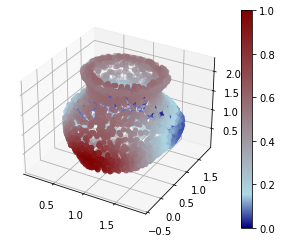

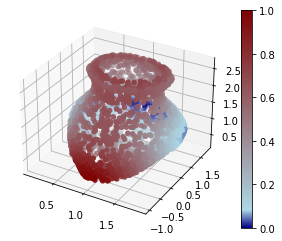

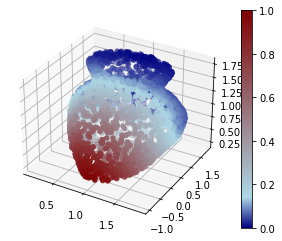

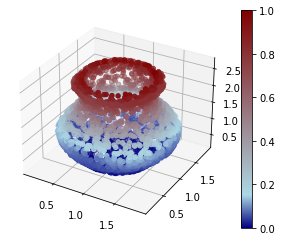

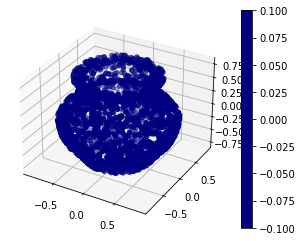

In [1062]:
generate_img(ed_distance_mixup,0.4)
generate_img(ed_distance_new_mixup,0.3)
generate_img(ed_distance_df1,0.4)
generate_img(ed_distance_df2,0.4)
generate_img(ed_origin,0.4)

## Mitsuba Rendering

In [930]:
import mitsuba as mi
import open3d as o3d
mi.set_variant("scalar_rgb")
from mitsuba import ScalarTransform4f as T

In [1063]:
scene1 = mi.load_file("Deform_custom_img/{}/render_xml/deform_1.xml".format(name))
scene2= mi.load_file("Deform_custom_img/{}/render_xml/deform_2.xml".format(name))
scene3 = mi.load_file("Deform_custom_img/{}/render_xml/deform_mixup.xml".format(name))
scene4 = mi.load_file("Deform_custom_img/{}/render_xml/deform_newmixup.xml".format(name))
scene0 = mi.load_file("Deform_custom_img/{}/render_xml/origin.xml".format(name))



In [1064]:
# scene0 = mi.load_file("Deform_custom_img/{}/render_xml/origin.xml".format(name))


In [1065]:
# scene3 = mi.load_file("Deform_custom_img/{}/render_xml/deform_mixup.xml".format(name))
# image3= mi.render(scene3, spp=16)
image4= mi.render(scene4, spp=16)


In [1033]:
image0 = mi.render(scene0, spp=16)
image1 = mi.render(scene1, spp=16)
image2 = mi.render(scene2, spp=16)
image3= mi.render(scene3, spp=16)
image4= mi.render(scene4, spp=16)


In [1034]:
# plt.imshow(image ** (1.0 / 2.2)); # approximate sRGB tonemapping


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


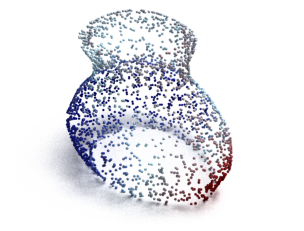

In [1066]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image3); # approximate sRGB tonemapping
# plt.savefig(‘)
# plt.imshow(image1); # approximate sRGB tonemapping
# plt.imshow(image2); # approximate sRGB tonemapping
# plt.imshow(image3); # approximate sRGB tonemapping


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


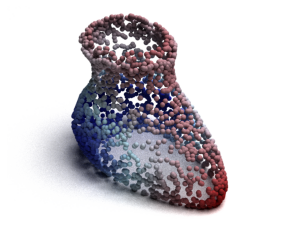

In [1067]:
plt.axis("off")
plt.imshow(image4);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


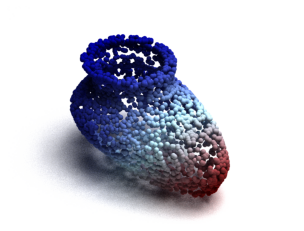

In [1068]:
plt.axis("off")
plt.imshow(image1);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


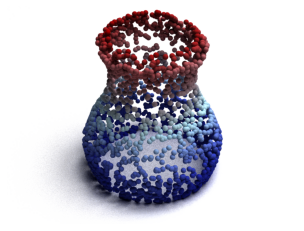

In [1069]:
plt.axis("off")
plt.imshow(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


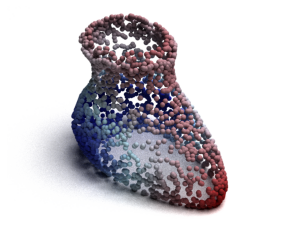

In [1070]:
plt.axis("off")
plt.imshow(image4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


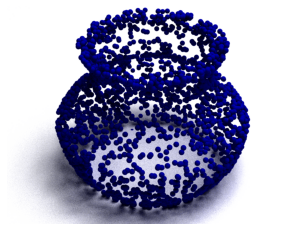

In [1071]:
plt.axis("off")
plt.imshow(image0)